In [70]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from pylab import rcParams
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier

#import geopandas as gpd
#from shapely.geometry import Points

In [30]:
## setting parameters data visualisation
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

In [31]:
df = pd.read_csv("2020-12-metropolitan-stop-and-search.csv")

In [32]:
df.head()

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,Person search,2020-12-01T00:00:00+00:00,False,NaN,51.528724,-0.017482,Male,18-24,Black/African/Caribbean/Black British - African,Black,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Arrest,NaN,NaN
1,Person and Vehicle search,2020-12-01T00:01:00+00:00,False,NaN,51.461264,-0.303021,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN
2,Person search,2020-12-01T00:05:00+00:00,False,NaN,NaN,NaN,Male,over 34,Asian/Asian British - Bangladeshi,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN
3,Person search,2020-12-01T00:05:00+00:00,False,NaN,51.461264,-0.303021,Male,25-34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN
4,Person and Vehicle search,2020-12-01T00:08:00+00:00,False,NaN,51.462786,-0.284063,Male,18-24,White - Any other White background,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN


In [33]:
df_c = df.copy()


#df_c 
#df_c
ethnicity  =  df_c["Officer-defined ethnicity"]

#cnt = ethnicity.isna()

#cnt.count()
ethnicity

df_c["Officer-defined ethnicity"].isnull().sum()

457

In [38]:
#his_plot  = df_notna.hist(column="Officer-defined ethnicity")

df_notnan = df[df_c['Officer-defined ethnicity'].notna()]

df_notnan

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,Person search,2020-12-01T00:00:00+00:00,False,NaN,51.528724,-0.017482,Male,18-24,Black/African/Caribbean/Black British - African,Black,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Arrest,NaN,NaN
1,Person and Vehicle search,2020-12-01T00:01:00+00:00,False,NaN,51.461264,-0.303021,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN
2,Person search,2020-12-01T00:05:00+00:00,False,NaN,NaN,NaN,Male,over 34,Asian/Asian British - Bangladeshi,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN
3,Person search,2020-12-01T00:05:00+00:00,False,NaN,51.461264,-0.303021,Male,25-34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN
4,Person and Vehicle search,2020-12-01T00:08:00+00:00,False,NaN,51.462786,-0.284063,Male,18-24,White - Any other White background,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20367,Person search,2020-12-31T23:55:00+00:00,False,NaN,51.444879,-0.377940,Male,25-34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN
20368,Person and Vehicle search,2020-12-31T23:55:00+00:00,False,NaN,51.359303,0.034847,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN
20369,Person search,2020-12-31T23:58:00+00:00,False,NaN,51.505045,-0.067474,Male,18-24,Asian/Asian British - Bangladeshi,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN
20370,Person search,2020-12-31T23:58:00+00:00,False,NaN,51.505045,-0.067474,Male,18-24,Asian/Asian British - Bangladeshi,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN


In [40]:
len(df_notnan)



19915

In [41]:
#np.isnan(df_c.values).sum() > 0
le = LabelEncoder()


In [42]:
df_notnan["Officer-defined ethnicity"]= le.fit_transform(df_notnan["Officer-defined ethnicity"])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
df_notnan

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,Person search,2020-12-01T00:00:00+00:00,False,NaN,51.528724,-0.017482,Male,18-24,Black/African/Caribbean/Black British - African,1,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Arrest,NaN,NaN
1,Person and Vehicle search,2020-12-01T00:01:00+00:00,False,NaN,51.461264,-0.303021,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,3,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN
2,Person search,2020-12-01T00:05:00+00:00,False,NaN,NaN,NaN,Male,over 34,Asian/Asian British - Bangladeshi,0,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN
3,Person search,2020-12-01T00:05:00+00:00,False,NaN,51.461264,-0.303021,Male,25-34,White - English/Welsh/Scottish/Northern Irish/...,3,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN
4,Person and Vehicle search,2020-12-01T00:08:00+00:00,False,NaN,51.462786,-0.284063,Male,18-24,White - Any other White background,3,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20367,Person search,2020-12-31T23:55:00+00:00,False,NaN,51.444879,-0.377940,Male,25-34,White - English/Welsh/Scottish/Northern Irish/...,3,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN
20368,Person and Vehicle search,2020-12-31T23:55:00+00:00,False,NaN,51.359303,0.034847,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,3,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN
20369,Person search,2020-12-31T23:58:00+00:00,False,NaN,51.505045,-0.067474,Male,18-24,Asian/Asian British - Bangladeshi,0,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN
20370,Person search,2020-12-31T23:58:00+00:00,False,NaN,51.505045,-0.067474,Male,18-24,Asian/Asian British - Bangladeshi,0,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN


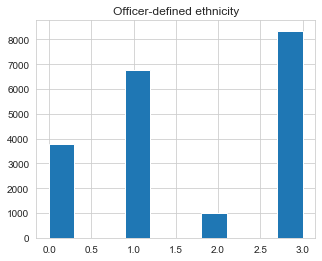

In [44]:
his_plot  = df_notnan.hist(column="Officer-defined ethnicity")

In [47]:
#df_dummys = pd.get_dummies(df_copy)
#df2["one"].fillna("missing")
df_c_fillna = df_c.fillna("missing ")

In [48]:
df_c_fillna


,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,Person search,2020-12-01T00:00:00+00:00,False,missing,51.5287,-0.017482,Male,18-24,Black/African/Caribbean/Black British - African,Black,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Arrest,missing,missing
1,Person and Vehicle search,2020-12-01T00:01:00+00:00,False,missing,51.4613,-0.303021,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,missing,missing
2,Person search,2020-12-01T00:05:00+00:00,False,missing,missing,missing,Male,over 34,Asian/Asian British - Bangladeshi,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,missing,missing
3,Person search,2020-12-01T00:05:00+00:00,False,missing,51.4613,-0.303021,Male,25-34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,missing,missing
4,Person and Vehicle search,2020-12-01T00:08:00+00:00,False,missing,51.4628,-0.284063,Male,18-24,White - Any other White background,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,missing,missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20367,Person search,2020-12-31T23:55:00+00:00,False,missing,51.4449,-0.37794,Male,25-34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,missing,missing
20368,Person and Vehicle search,2020-12-31T23:55:00+00:00,False,missing,51.3593,0.034847,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,missing,missing
20369,Person search,2020-12-31T23:58:00+00:00,False,missing,51.505,-0.067474,Male,18-24,Asian/Asian British - Bangladeshi,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,missing,missing
20370,Person search,2020-12-31T23:58:00+00:00,False,missing,51.505,-0.067474,Male,18-24,Asian/Asian British - Bangladeshi,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,missing,missing


In [73]:
df_c_fillna["Outcome"]= le.fit_transform(df_c_fillna["Outcome"])

df_c_fillna["Part of a policing operation"]= le.fit_transform(df_c_fillna["Part of a policing operation"])

df_c_fillna

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,Person search,2020-12-01T00:00:00+00:00,0,missing,51.5287,-0.017482,Male,18-24,Black/African/Caribbean/Black British - African,Black,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,1,missing,missing
1,Person and Vehicle search,2020-12-01T00:01:00+00:00,0,missing,51.4613,-0.303021,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,0,missing,missing
2,Person search,2020-12-01T00:05:00+00:00,0,missing,missing,missing,Male,over 34,Asian/Asian British - Bangladeshi,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,0,missing,missing
3,Person search,2020-12-01T00:05:00+00:00,0,missing,51.4613,-0.303021,Male,25-34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,0,missing,missing
4,Person and Vehicle search,2020-12-01T00:08:00+00:00,0,missing,51.4628,-0.284063,Male,18-24,White - Any other White background,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,0,missing,missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20367,Person search,2020-12-31T23:55:00+00:00,0,missing,51.4449,-0.37794,Male,25-34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,0,missing,missing
20368,Person and Vehicle search,2020-12-31T23:55:00+00:00,0,missing,51.3593,0.034847,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,0,missing,missing
20369,Person search,2020-12-31T23:58:00+00:00,0,missing,51.505,-0.067474,Male,18-24,Asian/Asian British - Bangladeshi,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,0,missing,missing
20370,Person search,2020-12-31T23:58:00+00:00,0,missing,51.505,-0.067474,Male,18-24,Asian/Asian British - Bangladeshi,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,0,missing,missing


In [74]:
df_dummys = pd.get_dummies(df_c_fillna)

In [75]:
df_dummys

,Part of a policing operation,Outcome,Type_Person and Vehicle search,Type_Person search,Type_Vehicle search,Date_2020-12-01T00:00:00+00:00,Date_2020-12-01T00:01:00+00:00,Date_2020-12-01T00:05:00+00:00,Date_2020-12-01T00:08:00+00:00,Date_2020-12-01T00:09:00+00:00,...,Object of search_Articles for use in criminal damage,Object of search_Controlled drugs,Object of search_Evidence of offences under the Act,Object of search_Firearms,Object of search_Fireworks,Object of search_Offensive weapons,Object of search_Stolen goods,Object of search_missing,Outcome linked to object of search_missing,Removal of more than just outer clothing_missing
0,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
1,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,1
2,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,1
3,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,1
4,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20367,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
20368,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
20369,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
20370,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1


In [76]:
y_df = df_dummys["Outcome"]
x_df = df_dummys.drop(['Outcome'], axis=1, inplace=False)
print(x_df.columns)

Index(['Part of a policing operation', 'Type_Person and Vehicle search',
       'Type_Person search', 'Type_Vehicle search',
       'Date_2020-12-01T00:00:00+00:00', 'Date_2020-12-01T00:01:00+00:00',
       'Date_2020-12-01T00:05:00+00:00', 'Date_2020-12-01T00:08:00+00:00',
       'Date_2020-12-01T00:09:00+00:00', 'Date_2020-12-01T00:10:00+00:00',
       ...
       'Object of search_Articles for use in criminal damage',
       'Object of search_Controlled drugs',
       'Object of search_Evidence of offences under the Act',
       'Object of search_Firearms', 'Object of search_Fireworks',
       'Object of search_Offensive weapons', 'Object of search_Stolen goods',
       'Object of search_missing ',
       'Outcome linked to object of search_missing ',
       'Removal of more than just outer clothing_missing '],
      dtype='object', length=23529)


In [77]:
X = x_df
y =y_df

In [78]:
train_x, test_x,train_y, test_y = train_test_split(X, y, test_size= .2, random_state= 50, stratify =y)
#train_x2, val = train_test_split(train_x)


In [95]:
model = RandomForestClassifier(n_estimators=100, max_depth= 3)
modelRF = cross_val_score(model, train_x, train_y, scoring=None, cv=10)


In [96]:
print(modelRF)  #'jaccard_weighted'

[0.74539877 0.74539877 0.74539877 0.74539877 0.74539877 0.74539877
 0.74539877 0.74585635 0.74524248 0.74524248]
